In [9]:
#Importing needed modules .
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
#Reading csv file and getting 10 sample of that randomly .
path = "D:\\datasets\\college_reviews\\collegereview2022.csv"
file = pd.read_csv(path,index_col=0)
df = file.copy()
df.sample(10)

,Name,college,review,rating
4373,Deepak,Delhi Technological University - [DTU],I want to learn Computer science and engineeri...,8.6
1634,Vardhan Reddy,Chitkara University,We have Dj nights for every 2 months and month...,10.0
194,Vishal Mangasuli,"University BDT College of Engineering, Visvesv...",Overall course curriculum is way good then any...,8.0
4146,Surya Prakash Mohanty,Government College of Engineering,"For the 4years Btech course, you have to pay R...",4.8
2628,Ujjwal Chaturvedi,Oriental Institute of Science and Technology -...,Tech fests are conducted in march usually afte...,7.4
1746,Shubham kumar,Guru Gobind Singh Indraprastha University - [G...,"As a student from my starting days, I was bein...",7.8
7398,PIYUSH KUMAR DWIVEDI,National Institute of Technology - [NIT],College faculty are the best. It includes from...,6.7
7038,Ashish Kumar Rathour,Truba Institute of Engineering and Information...,My college admissions story starts in 2018. I ...,8.5
8470,Pruthvi batta,National Institute of Technology - [NIT],In our college annually two fest are celebrate...,7.7
2251,Sandeep Kumar,Lovely Professional University - [LPU],Life here at LPU is just awesome. You get to m...,7.7


In [11]:
#Droping duplicated samples and null values .
df = df.drop_duplicates().dropna()
#Getting information from data frame .
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9629 entries, 0 to 9696
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     9629 non-null   object 
 1   college  9629 non-null   object 
 2   review   9629 non-null   object 
 3   rating   9629 non-null   float64
dtypes: float64(1), object(3)
memory usage: 376.1+ KB


In [12]:
#Seperating labels .
label = df.rating

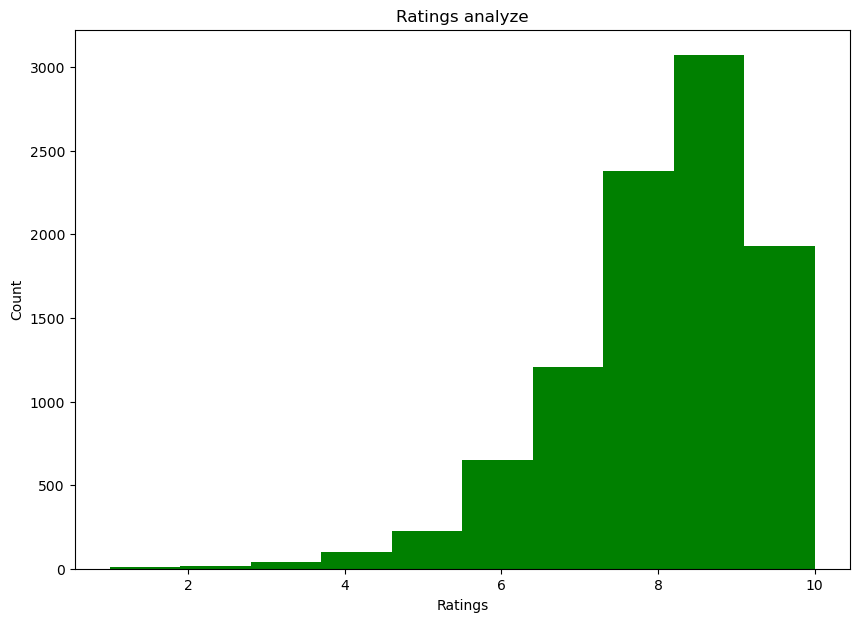

In [13]:
#Plotting a histogram of labels . 
plt.figure(figsize=(10,7))
plt.hist(label,color='green')
plt.title('Ratings analyze')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [15]:
#Seperating features .
features = [Filter(text) for text in df.review]

In [16]:
#Tokenizing reviews and creating a matrix from them .
tokenizer = Tokenizer(oov_token='<00U00>')
tokenizer.fit_on_texts(features)
sequnces = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequnces,padding='post',truncating='post',maxlen=30)

In [17]:
#Seperating features and labels to train and valid .
train_x , valid_x , train_y , valid_y = train_test_split(matrix,label,test_size=0.2,random_state=42)

In [18]:
print(f'There are {len(train_x)} texts for train and {len(valid_x)} texts for valid')

There are 7703 texts for train and 1926 texts for valid


In [19]:
#Defining a model by a function .
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,1,input_length=30),
                               layers.Flatten(),
                               layers.Dense(3,activation='relu'),
                              layers.Dense(1)])
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [20]:
#datas train .
history = Create_model().fit(train_x,train_y,epochs = 20 , validation_data = (valid_x,valid_y))

Epoch 1/20
241/241 [==============================] - 1s 2ms/step - loss: 61.5517 - mae: 7.7320 - val_loss: 53.6204 - val_mae: 7.2047
Epoch 2/20
241/241 [==============================] - 0s 1ms/step - loss: 34.0530 - mae: 5.5704 - val_loss: 12.6178 - val_mae: 3.2962
Epoch 3/20
241/241 [==============================] - 0s 1ms/step - loss: 4.1523 - mae: 1.6300 - val_loss: 2.5767 - val_mae: 1.2656
Epoch 4/20
241/241 [==============================] - 0s 1ms/step - loss: 2.3432 - mae: 1.1935 - val_loss: 2.2990 - val_mae: 1.1877
Epoch 5/20
241/241 [==============================] - 0s 1ms/step - loss: 2.0856 - mae: 1.1165 - val_loss: 2.1314 - val_mae: 1.1418
Epoch 6/20
241/241 [==============================] - 0s 1ms/step - loss: 1.9099 - mae: 1.0622 - val_loss: 2.0218 - val_mae: 1.1029
Epoch 7/20
241/241 [==============================] - 0s 1ms/step - loss: 1.7824 - mae: 1.0216 - val_loss: 1.9563 - val_mae: 1.0865
Epoch 8/20
241/241 [==============================] - 0s 1ms/step - loss

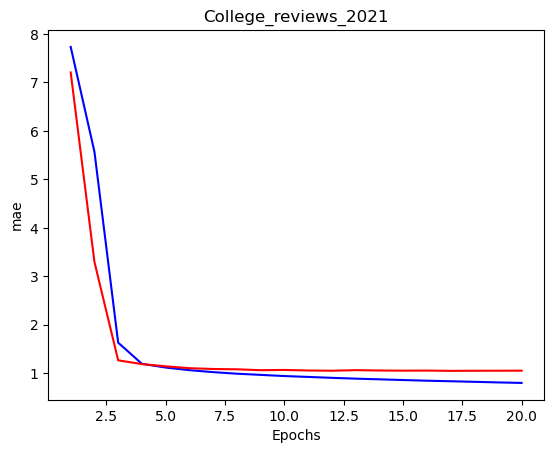

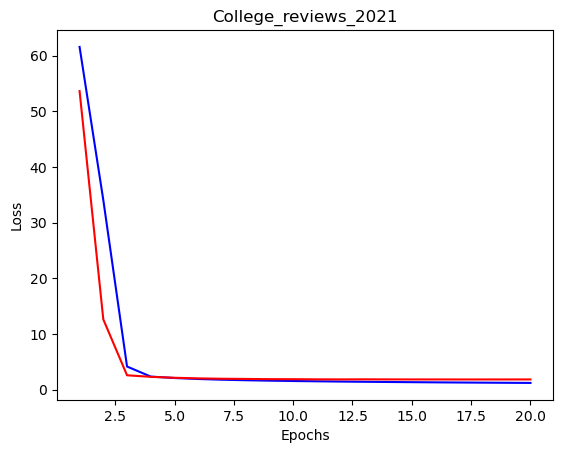

In [21]:
#Visualize models performance
epoch = range(1,21)
results = history.history
plt.plot(epoch,results['mae'],'blue')
plt.plot(epoch,results['val_mae'],'red')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('College_reviews_2021')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('College_reviews_2021')
plt.show()